In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/gunnvantsaini/Data/Work/Python Trainings/PythonForModellers/Data/dm.csv")

In [3]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [4]:
### Sanity Check on the data===> Are the numbers looking as we expect them to look like, missing values, extreme

In [5]:
data.describe()

,Salary,Children,Catalogs,AmountSpent,Cust_Id
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000,643.930000
std,30616.314826,1.05107,6.622895,961.068613,369.047166
min,10100.000000,0.00000,6.000000,38.000000,12.000000
25%,29975.000000,0.00000,6.000000,488.250000,316.750000
50%,53700.000000,1.00000,12.000000,962.000000,636.000000
75%,77025.000000,2.00000,18.000000,1688.500000,955.500000
max,168800.000000,3.00000,24.000000,6217.000000,1297.000000


In [8]:
data.isnull().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
Cust_Id        0
dtype: int64

In [7]:
data['History']=data['History'].fillna("NewCust")

In [9]:
### Explore+Prepare the data:
# To see intuitively if the columns (Predictors) are related to the target variable that I am trying to predict

In [10]:
data.groupby('Age')['AmountSpent'].mean()

Age
Middle    1501.690945
Old       1432.126829
Young      558.623693
Name: AmountSpent, dtype: float64

In [11]:
data.groupby('Age').agg({'AmountSpent':['mean','min','max']})

AmountSpent           
               mean  min   max
Age                           
Middle  1501.690945  157  5878
Old     1432.126829   65  6217
Young    558.623693   38  3688

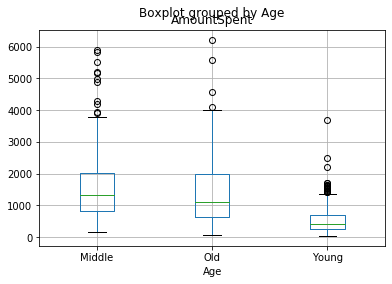

In [12]:
### Visually: Boxplot
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(by="Age",column="AmountSpent")

In [13]:
## Prepare my data 
## Middle-Old is Group1
## Young- Group2
data['Age_N']=data['Age'].map(lambda x:"Middle-Old" if x!="Young" else "Young")

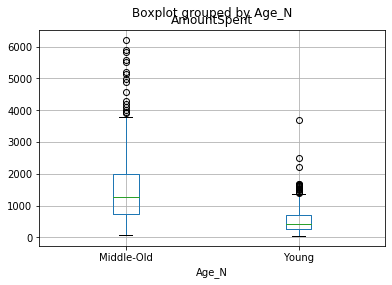

In [14]:
data.boxplot(by="Age_N",column="AmountSpent")

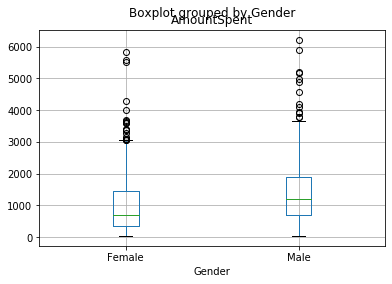

In [15]:
data.boxplot(by="Gender",column="AmountSpent")

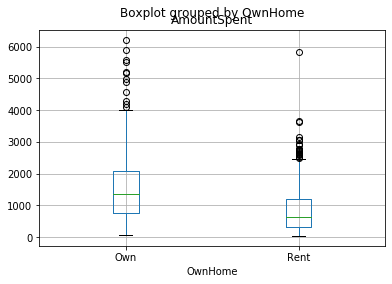

In [16]:
### Worth checking by modelling this?
data.boxplot(by="OwnHome",column="AmountSpent")

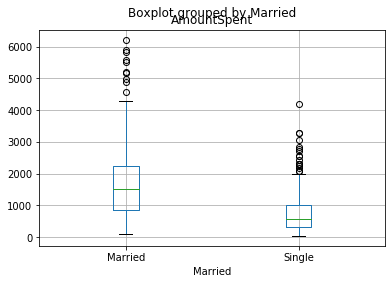

In [17]:
data.boxplot(by="Married",column="AmountSpent")

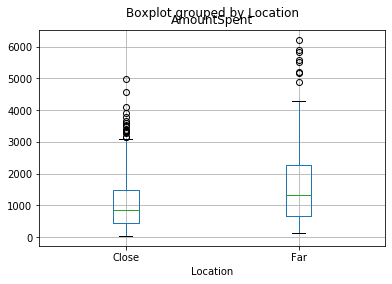

In [18]:
data.boxplot(by="Location",column="AmountSpent")

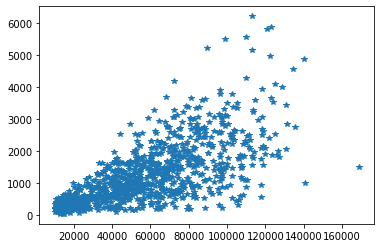

In [19]:
plt.plot(data['Salary'],data['AmountSpent'],"*")

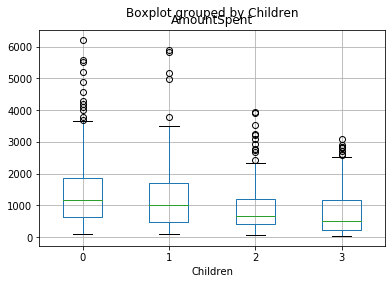

In [20]:
data.boxplot(by="Children",column="AmountSpent")

In [21]:
data['Children_01']=data['Children'].map(lambda x: 1 if x<=1 else 0)

In [22]:
data['Children_23']=data['Children'].map(lambda x: 1 if x>=2 else 0)

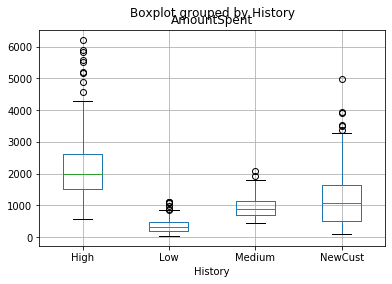

In [23]:
data.boxplot(by="History",column="AmountSpent")

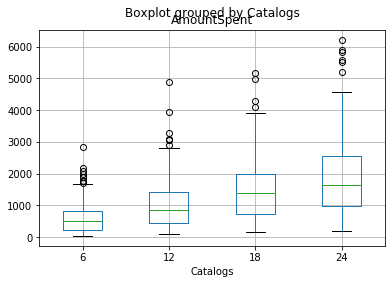

In [24]:
data.boxplot(by="Catalogs",column="AmountSpent")

In [25]:
data.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id', 'Age_N', 'Children_01',
       'Children_23'],
      dtype='object')

In [45]:
### Divide our data into train and test
train=data.sample(frac=0.70,random_state=42)
test=data.drop(train.index)

In [46]:
train.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Age_N,Children_01,Children_23
521,Old,Female,Own,Single,Close,24400,0,Low,6,491,26,Middle-Old,1,0
737,Young,Female,Own,Single,Far,21900,2,Low,24,486,313,Young,0,1


In [47]:
test.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Age_N,Children_01,Children_23
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,Middle-Old,1,0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,Middle-Old,1,0


In [49]:
import statsmodels.formula.api as smf

In [52]:
mod1=smf.ols("AmountSpent~Age_N+Gender+OwnHome+Married+Salary+Children_01+History+Catalogs+Location",data=train).fit()

In [53]:
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 10 Jul 2019   Prob (F-statistic):          1.92e-199
Time:                        14:49:10   Log-Likelihood:                -5269.1
No. Observations:                 700   AIC:                         1.056e+04
Df Residuals:                     688   BIC:                         1.062e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -405.2713    130

In [54]:
train['Hist_L']=train['History'].map(lambda x: 1 if x=="Low" else 0)
train['Hist_M']=train['History'].map(lambda x: 1 if x=="Medium" else 0)
test['Hist_L']=test['History'].map(lambda x: 1 if x=="Low" else 0)
test['Hist_M']=test['History'].map(lambda x: 1 if x=="Medium" else 0)

In [55]:
formula="AmountSpent~Hist_L+Hist_M+Location+Salary+Children_01+Catalogs"

In [56]:
mod2=smf.ols(formula,data=train).fit()

In [57]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     344.7
Date:                Wed, 10 Jul 2019   Prob (F-statistic):          3.11e-204
Time:                        14:57:17   Log-Likelihood:                -5272.3
No. Observations:                 700   AIC:                         1.056e+04
Df Residuals:                     693   BIC:                         1.059e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -580.9533     73.941     

In [58]:
### Check the behaviour of our model's error terms
### Check if by mistake we have included a predictor that is related to other predictors

In [59]:
errors=mod2.resid

In [60]:
predictions=mod2.fittedvalues

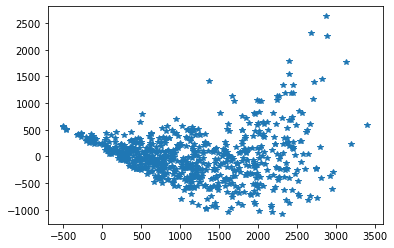

In [61]:
plt.plot(predictions,errors,"*")

In [62]:
## x>f(x), x<f(x), log(AmountSpent), AmountSpent**2
formula="np.log(AmountSpent)~Hist_L+Hist_M+Location+Salary+Children_01+Catalogs"
mod3=smf.ols(formula,data=train).fit()

In [63]:
print(mod3.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(AmountSpent)   R-squared:                       0.835
Model:                             OLS   Adj. R-squared:                  0.834
Method:                  Least Squares   F-statistic:                     585.6
Date:                 Wed, 10 Jul 2019   Prob (F-statistic):          1.74e-267
Time:                         15:23:30   Log-Likelihood:                -254.77
No. Observations:                  700   AIC:                             523.5
Df Residuals:                      693   BIC:                             555.4
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.1357      

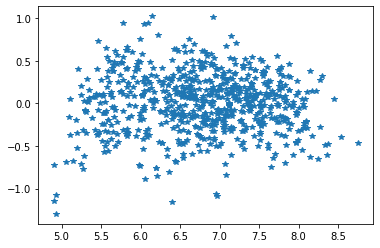

In [64]:
errors=mod3.resid
predictions=mod3.fittedvalues
plt.plot(predictions,errors,"*")

In [65]:
## If the predictors are related to each other
# Compute VIF (Variance Inflation Factor)== Correlation
# For each predictor, 
# VIF>5, predictor is related to others, we will drop it



In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
from patsy import dmatrices

In [68]:
y,X=dmatrices(formula,train,return_type="dataframe")

In [69]:
X.head()

,Intercept,Location[T.Far],Hist_L,Hist_M,Salary,Children_01,Catalogs
521,1.0,0.0,1.0,0.0,24400.0,1.0,6.0
737,1.0,1.0,1.0,0.0,21900.0,0.0,24.0
740,1.0,0.0,1.0,0.0,37100.0,0.0,24.0
660,1.0,0.0,1.0,0.0,10600.0,0.0,12.0
411,1.0,1.0,0.0,0.0,42500.0,1.0,6.0


In [70]:
y.head()

,np.log(AmountSpent)
521,6.196444
737,6.186209
740,6.481577
660,4.736198
411,6.682109


In [71]:
variance_inflation_factor(X.values,0) ## vif for intercept

18.574976981948794

In [72]:
variance_inflation_factor(X.values,1) ## vif for Location

1.0560656446987133

In [73]:
[variance_inflation_factor(X.values,i) for i in range(0,X.shape[1])]

[18.574976981948794,
 1.0560656446987133,
 1.582428336269902,
 1.1563789509161053,
 1.3464733306825805,
 1.1109911764428047,
 1.0438981863211798]

In [74]:
X.columns

Index(['Intercept', 'Location[T.Far]', 'Hist_L', 'Hist_M', 'Salary',
       'Children_01', 'Catalogs'],
      dtype='object')

In [75]:
## No Multicollinearity===>No redundancy

In [76]:
print(mod3.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(AmountSpent)   R-squared:                       0.835
Model:                             OLS   Adj. R-squared:                  0.834
Method:                  Least Squares   F-statistic:                     585.6
Date:                 Wed, 10 Jul 2019   Prob (F-statistic):          1.74e-267
Time:                         15:33:35   Log-Likelihood:                -254.77
No. Observations:                  700   AIC:                             523.5
Df Residuals:                      693   BIC:                             555.4
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.1357      

In [79]:
prediction_model=np.exp(mod3.predict(test))

In [80]:
actual=test['AmountSpent']

In [81]:
rows=range(0,test.shape[0])

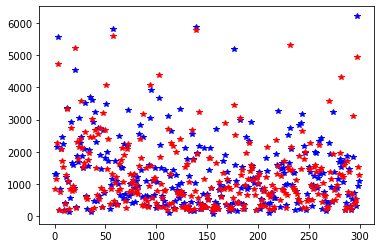

In [83]:
plt.plot(rows,actual,"b*",rows,prediction_model,"r*")

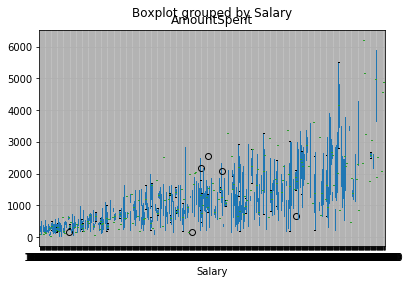

In [84]:
data.boxplot(by="Salary",column="AmountSpent")